In [7]:
using Images, Colors, Base;

if nprocs() < 4
    addprocs(5);
end

@everywhere using Images, Colors, Base;

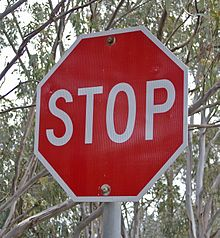

In [11]:
@everywhere begin

    img = load("image.jpg");
    color_image = convert(Array{Float64},channelview(img));
    grayscale = map(x -> x > 1 ? 1 : x, sum(copy(color_image), 1)./3);

    _, img_width, img_height = size(grayscale);

    grayscale = reshape(grayscale, img_width, img_height);
end
display( colorview(Gray, grayscale))

# Sobel operators

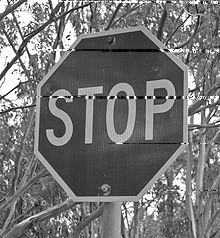

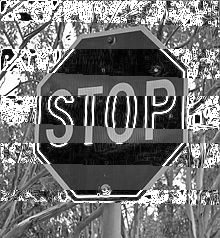

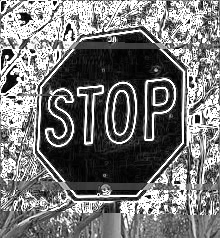

In [17]:
image_sobel = convert(SharedArray, copy(grayscale));

@everywhere begin
    Gx=[1 0 -1; 2 0 -2; 1 0 -1]
    Gy=[1 2 1; 0 0 0; -1 -2 -1]
    padding = trunc(Int,(size(Gx, 1)-1)/2)
end

@parallel for x = padding+1:img_width-padding
     for y = padding+1:img_height-padding

        current = grayscale[x-padding:x+padding,y-padding:y+padding]
        dist = sqrt(sum(current .* Gx)^2 + sum(current .* Gy)^2);

        image_sobel[x, y] = dist;
    end;
end;

display( colorview(Gray, image_sobel))
sleep(0.5)
display(colorview(Gray, image_sobel))
sleep(0.25)
display(colorview(Gray, image_sobel))

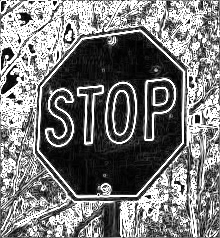

In [13]:
colorview(Gray, image_sobel)